## Python End Project

### ABC Company Employee Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('ABC Company.xlsx')

In [4]:
# Preprocessing - Correct the height column
# Replace height values with random numbers between 150 and 180
df['Height'] = np.random.randint(150, 181, size=len(df))

In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64


In [6]:
# Handle missing salary values (replace with median)
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

In [7]:
# Convert height to numeric (in case there are any non-numeric entries)
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

## 1. Distribution of Employees Across Teams

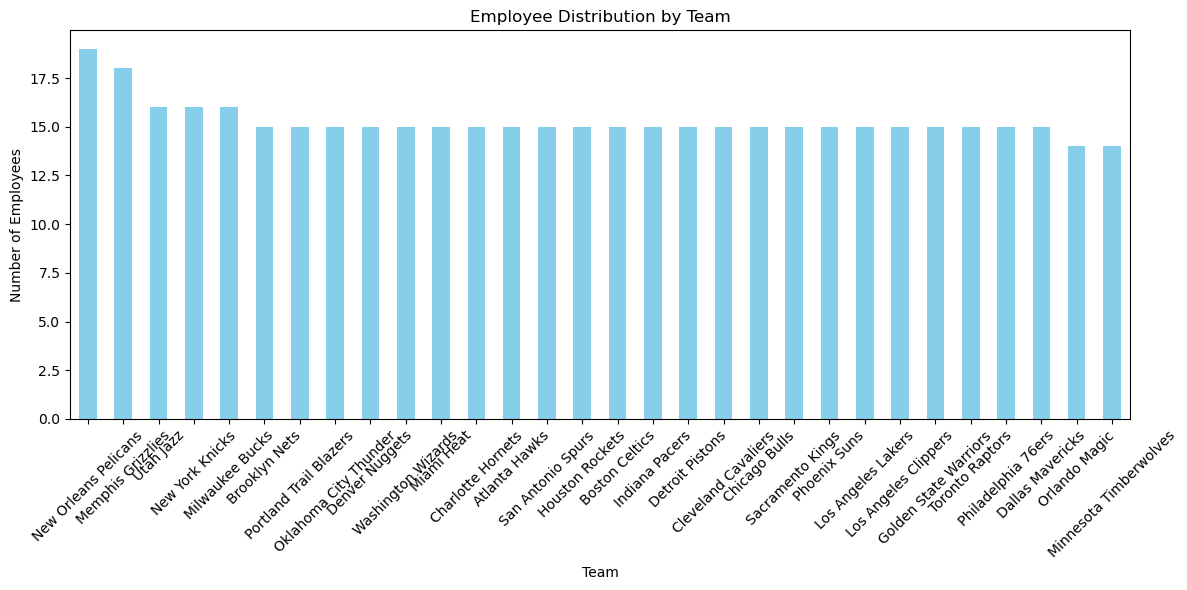


Percentage distribution by team:
Team
New Orleans Pelicans      4.1
Memphis Grizzlies         3.9
Utah Jazz                 3.5
New York Knicks           3.5
Milwaukee Bucks           3.5
Brooklyn Nets             3.3
Portland Trail Blazers    3.3
Oklahoma City Thunder     3.3
Denver Nuggets            3.3
Washington Wizards        3.3
Miami Heat                3.3
Charlotte Hornets         3.3
Atlanta Hawks             3.3
San Antonio Spurs         3.3
Houston Rockets           3.3
Boston Celtics            3.3
Indiana Pacers            3.3
Detroit Pistons           3.3
Cleveland Cavaliers       3.3
Chicago Bulls             3.3
Sacramento Kings          3.3
Phoenix Suns              3.3
Los Angeles Lakers        3.3
Los Angeles Clippers      3.3
Golden State Warriors     3.3
Toronto Raptors           3.3
Philadelphia 76ers        3.3
Dallas Mavericks          3.3
Orlando Magic             3.1
Minnesota Timberwolves    3.1
Name: proportion, dtype: float64


In [8]:
# Calculate team distribution
team_dist = df['Team'].value_counts()
team_perc = df['Team'].value_counts(normalize=True) * 100

# Visualization
plt.figure(figsize=(12, 6))
team_dist.plot(kind='bar', color='skyblue')
plt.title('Employee Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nPercentage distribution by team:")
print(team_perc.round(1))

## 2. Employee Segregation by Position

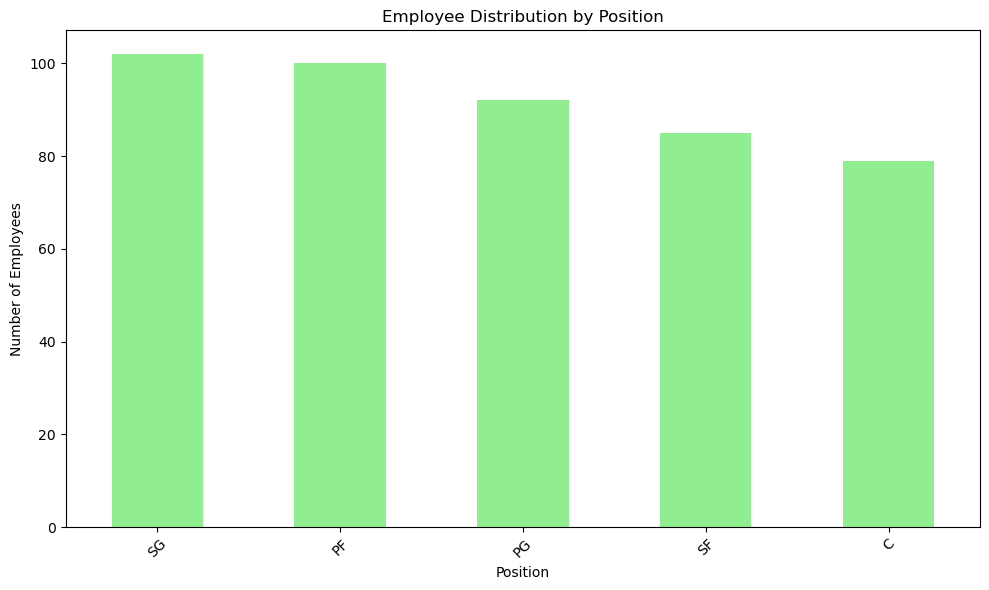

In [9]:
# Position distribution
position_dist = df['Position'].value_counts()

# Visualization
plt.figure(figsize=(10, 6))
position_dist.plot(kind='bar', color='lightgreen')
plt.title('Employee Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Predominant Age Group

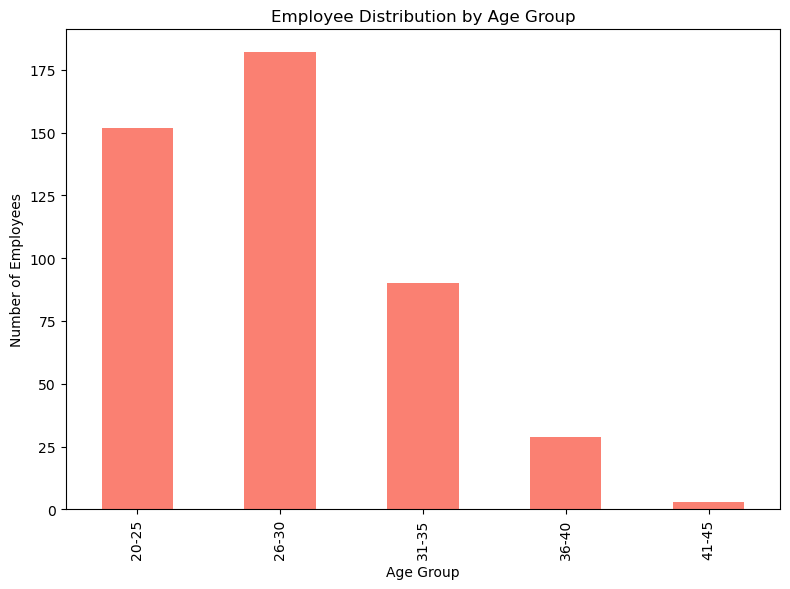


Most common age group: 26-30


In [10]:
# Age group analysis
bins = [20, 25, 30, 35, 40, 45]
labels = ['20-25', '26-30', '31-35', '36-40', '41-45']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_dist = df['Age Group'].value_counts().sort_index()

# Visualization
plt.figure(figsize=(8, 6))
age_dist.plot(kind='bar', color='salmon')
plt.title('Employee Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

print("\nMost common age group:", age_dist.idxmax())

## 4. Team and Position with Highest Salary Expenditure

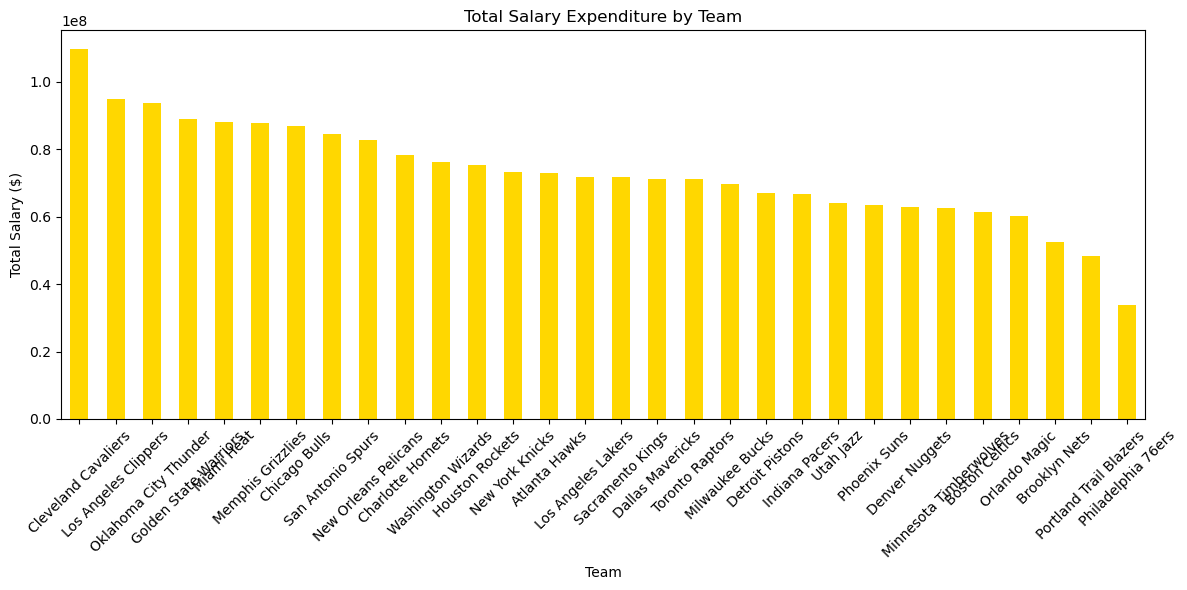

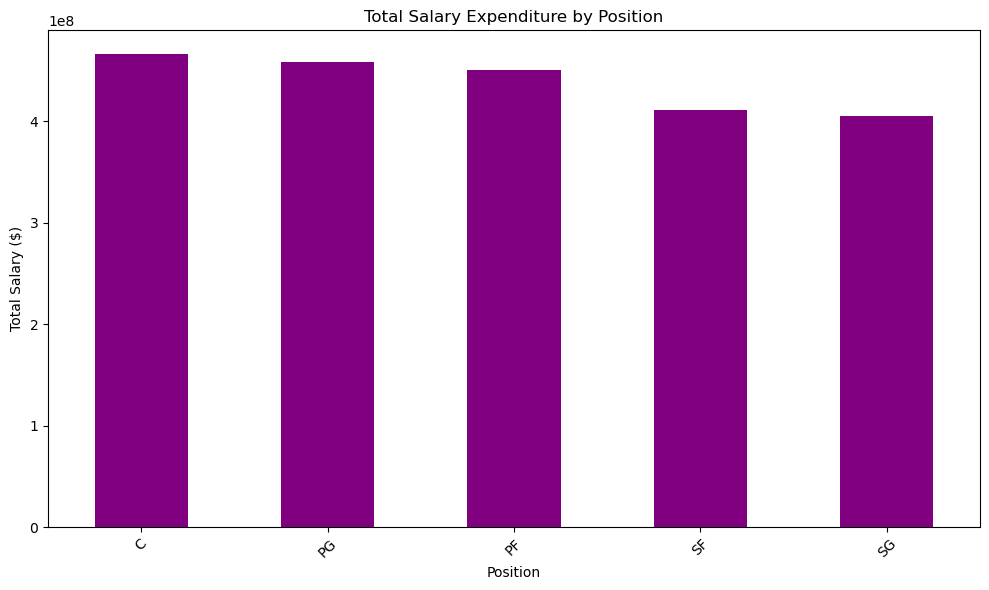


Team with highest salary expenditure: Cleveland Cavaliers
Position with highest salary expenditure: C


In [11]:
# Salary by team
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)

# Salary by position
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

# Visualization - Team salary expenditure
plt.figure(figsize=(12, 6))
team_salary.plot(kind='bar', color='gold')
plt.title('Total Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization - Position salary expenditure
plt.figure(figsize=(10, 6))
position_salary.plot(kind='bar', color='purple')
plt.title('Total Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nTeam with highest salary expenditure:", team_salary.idxmax())
print("Position with highest salary expenditure:", position_salary.idxmax())

## 5. Correlation Between Age and Salary

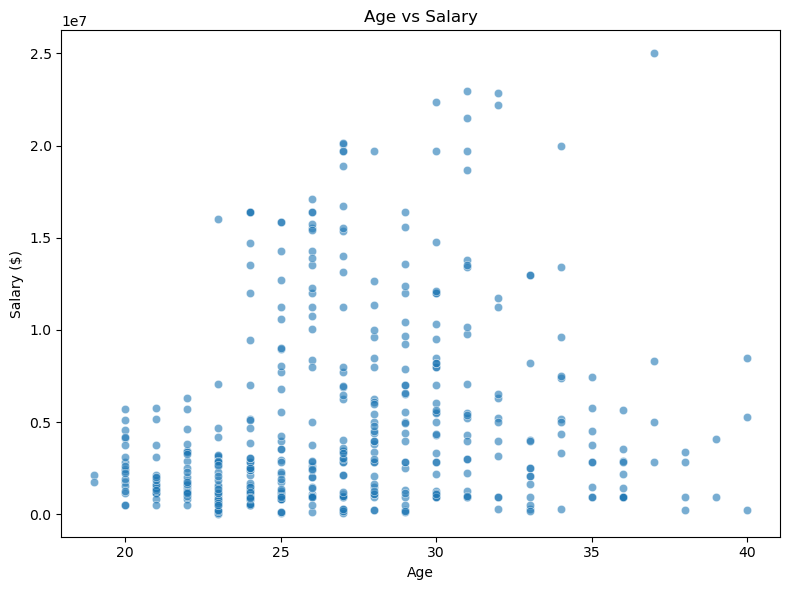


Correlation between age and salary: 0.209


In [12]:
# Correlation analysis
correlation = df[['Age', 'Salary']].corr()

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df, alpha=0.6)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary ($)')
plt.tight_layout()
plt.show()

print("\nCorrelation between age and salary:", correlation.loc['Age', 'Salary'].round(3))